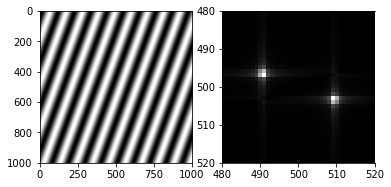

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/9
grating = np.sin(
    2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / wavelength
)


plt.set_cmap('gray')

plt.subplot(121)
plt.imshow(grating)

ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

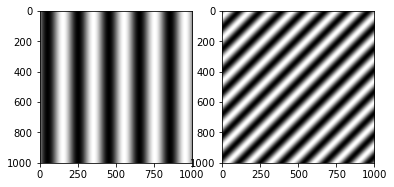

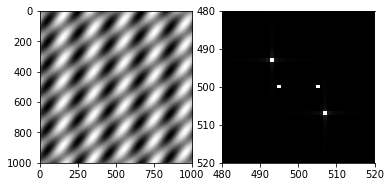

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 200
angle_1 = 0
grating_1 = np.sin(
    2 * np.pi * (X * np.cos(angle_1) + Y * np.sin(angle_1)) / wavelength_1
)
wavelength_2 = 100
angle_2 = np.pi/4
grating_2 = np.sin(
    2 * np.pi * (X * np.cos(angle_2) + Y * np.sin(angle_2)) / wavelength_2
)

plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()

gratings = grating_1 + grating_2

ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

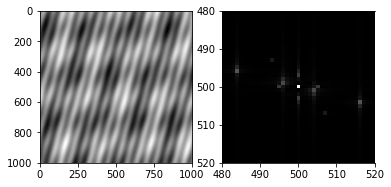

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2 * np.pi * (X * np.cos(angle) + Y * np.sin(angle)) / w_len
)
    
gratings += 1.25
    
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

In [4]:
import matplotlib.pyplot as plt

image_filename = 'Earth.png'

image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis = 2)
print(image.shape)

plt.set_cmap('gray')

plt.imshow(image)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Earth.png'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_filename = 'Earth.png'

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis = 2)

plt.set_cmap('gray')

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_filename = 'Earth.png'

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis('off')
    plt.suptitle(f'Terms: {idx}')
    plt.pause(0.01)

image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis = 2)

array_size = len(image)
centre = int((array_size - 1) / 2)

coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre + 1)
)

coords_left_half = sorted(
    coords_left_half,
    key = lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap('gray')

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis('off')
plt.pause(2)

fig = plt.figure()

rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype = 'complex'
)
idx = 0

display_all_until = 200
display_step = 10
next_display = display_all_until + display_step

for coords in coords_left_half:
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0
        
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)
        
plt.show()

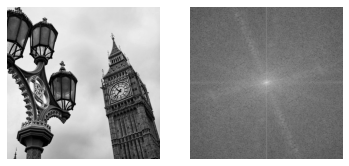

Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49


KeyboardInterrupt: 

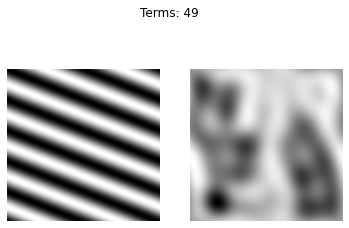

In [5]:
import matplotlib.pyplot as plt
import numpy as np

image_filename = 'Elizabeth_Tower_London.jpg'

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis('off')
    plt.suptitle(f'Terms: {idx}')
    #plt.pause(0.01)

image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis = 2)

array_size = min(image.shape) - 1 + min(image.shape) % 2

image = image[:array_size, :array_size]
centre = int((array_size - 1) / 2)

coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre + 1)
)

coords_left_half = sorted(
    coords_left_half,
    key = lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap('gray')

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis('off')
plt.pause(2)

fig = plt.figure()

rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype = 'complex'
)
idx = 0

display_all_until = 200
display_step = 10
next_display = display_all_until + display_step

file_number = 0
for coords in coords_left_half:
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating
        
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0        
        
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)
            print(f'Saving image {file_number + 1}')
            plt.savefig(f'image_{file_number}.png')
            file_number += 1
        
#plt.show()